In [2]:
# some common imports
import ipytest
ipytest.autoconfig()

In [56]:
# Run this cell to run any unit tests in this notebook
# make sure you run the cell with the test in it first.
ipytest.run('-vv') 

======================================= test session starts =======================================
platform win32 -- Python 3.10.15, pytest-8.3.4, pluggy-1.5.0 -- c:\Users\Wesley Bush\OneDrive\Documents\@Code\aoc-2024-python\.venv\Scripts\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\Wesley Bush\OneDrive\Documents\@Code\aoc-2024-python
configfile: pyproject.toml
collecting ... collected 4 items

t_12dbe7a7da8f4abb877e764886a1ec45.py::test_part1 PASSED                                     [ 25%]
t_12dbe7a7da8f4abb877e764886a1ec45.py::test_part2 PASSED                                     [ 50%]
t_12dbe7a7da8f4abb877e764886a1ec45.py::test_part1real PASSED                                 [ 75%]
t_12dbe7a7da8f4abb877e764886a1ec45.py::test_part2real PASSED                                 [100%]

======================================== 4 passed in 0.05s ========================================


<ExitCode.OK: 0>

## Problem Synopsis
What is this day all about

### Part 1

In [2]:
# TODO: read in data/day01_sample.txt and parse/split/process it
def readinput(filename):
    with open(filename, "r") as file:
        lines=file.read().splitlines()
    return lines

In [5]:
# TODO: read in data/day01.txt
real_input = 'real data'

In [ ]:
lines = readinput("../data/day02.txt")

def part1(lines):
    lines = [y.strip().split() for y in lines] 
    for i in range(len(lines)):
        for j in range(len(lines[i])):
            lines[i][j] = int(lines[i][j])

    return lines

twolist = part1(lines)

goodones = 0
badones = 0

print(twolist)

for report in range(len(twolist)):
    print(twolist[report])

    desclist = list(twolist[report])
    desclist.sort(reverse=False)
    asclist = list(twolist[report])
    asclist.sort(reverse=True)
    
    if twolist[report] == desclist or twolist[report] == asclist:
        print("asc/desc good")
    else:
        print("asc/desc BAD")
        badones = badones+1
        continue

    differencetest = False
       
    for level in range(len(twolist[report])-1):
        difference = int(twolist[report][level+1])-int(twolist[report][level])
        print(difference)

        if abs(difference) >0 and abs(difference) <4:
            print("good difference") 
            differencetest = True
        else:
            print("bad difference")
            differencetest = False
            break
    
    if differencetest:
        goodones = goodones+1
    else:
        badones = badones+1
    
    print("goodonescount ={}".format(goodones))
    

print("goodones ={}, badones ={}".format(goodones,badones))


        
# mine gives 306 goodones, dad's gives 346. 
# mine gives 341 goodones, dad's gives 346 (I think it was 346 maybe not)

#using my data, I got 463 goodones, which was correct

[[11, 12, 15, 18, 19, 18], [84, 86, 88, 89, 92, 92], [18, 19, 21, 23, 24, 25, 29], [56, 59, 60, 61, 63, 66, 73], [11, 13, 15, 13, 15], [36, 38, 36, 39, 42, 43, 40], [21, 22, 23, 21, 21], [35, 37, 38, 39, 37, 41], [56, 58, 55, 57, 58, 60, 61, 68], [77, 78, 80, 80, 83, 85, 88, 89], [79, 81, 82, 82, 83, 80], [89, 90, 91, 91, 91], [69, 71, 73, 73, 76, 78, 82], [2, 4, 5, 8, 8, 13], [60, 63, 67, 70, 72, 73, 74, 75], [15, 16, 18, 22, 19], [18, 21, 25, 28, 31, 31], [58, 61, 65, 66, 67, 71], [50, 53, 56, 58, 61, 63, 67, 74], [51, 54, 56, 58, 59, 62, 67, 70], [78, 81, 82, 84, 90, 89], [62, 64, 65, 71, 73, 73], [68, 71, 76, 79, 81, 85], [23, 25, 30, 32, 34, 36, 37, 44], [68, 66, 67, 69, 72, 73, 76], [52, 51, 54, 56, 59, 58], [26, 24, 25, 27, 29, 31, 32, 32], [80, 78, 80, 83, 85, 89], [4, 1, 2, 5, 8, 10, 17], [11, 8, 9, 10, 9, 12, 13, 14], [32, 30, 29, 30, 31, 28], [89, 87, 84, 87, 89, 90, 91, 91], [50, 47, 44, 45, 49], [11, 9, 10, 9, 12, 14, 16, 21], [35, 33, 34, 37, 37, 38], [29, 27, 30, 30, 27]

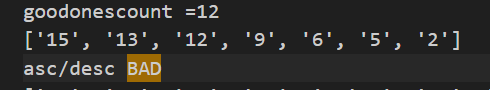

In [6]:


def parseinput(lines):
    lines = [y.strip().split() for y in lines] 
    for i in range(len(lines)):
        for j in range(len(lines[i])):
            lines[i][j] = int(lines[i][j])

    return lines



def logic(twolist):    
    goodones = 0
    badones = 0
    for report in range(len(twolist)):
        print(twolist[report])

        desclist = list(twolist[report])
        desclist.sort(reverse=False)
        asclist = list(twolist[report])
        asclist.sort(reverse=True)
        
        if twolist[report] == desclist or twolist[report] == asclist:
            print("asc/desc good")
        else:
            print("asc/desc BAD")
            badones = badones+1
            continue

        differencetest = False
        
        for level in range(len(twolist[report])-1):
            difference = int(twolist[report][level+1])-int(twolist[report][level])
            print(difference)

            if abs(difference) >0 and abs(difference) <4:
                print("good difference") 
                differencetest = True
            else:
                print("bad difference")
                differencetest = False
                break
        
        if differencetest:
            goodones = goodones+1
        else:
            badones = badones+1
        
        print("goodonescount ={}".format(goodones))
    return (goodones,badones)




        
def part1(filename):
    lines = readinput(filename)
    lines = parseinput(lines)
    goodones,badones = logic(twolist)
    print("goodones ={}, badones ={}".format(goodones,badones))

part1("../data/day02.txt")

# mine gives 306 goodones, dad's gives 346. 
# mine gives 341 goodones, dad's gives 346 (I think it was 346 maybe not)

#using my data, I got 463 goodones, which was correct

[11, 12, 15, 18, 19, 18]
asc/desc BAD
[84, 86, 88, 89, 92, 92]
asc/desc good
2
good difference
2
good difference
1
good difference
3
good difference
0
bad difference
goodonescount =0
[18, 19, 21, 23, 24, 25, 29]
asc/desc good
1
good difference
2
good difference
2
good difference
1
good difference
1
good difference
4
bad difference
goodonescount =0
[56, 59, 60, 61, 63, 66, 73]
asc/desc good
3
good difference
1
good difference
1
good difference
2
good difference
3
good difference
7
bad difference
goodonescount =0
[11, 13, 15, 13, 15]
asc/desc BAD
[36, 38, 36, 39, 42, 43, 40]
asc/desc BAD
[21, 22, 23, 21, 21]
asc/desc BAD
[35, 37, 38, 39, 37, 41]
asc/desc BAD
[56, 58, 55, 57, 58, 60, 61, 68]
asc/desc BAD
[77, 78, 80, 80, 83, 85, 88, 89]
asc/desc good
1
good difference
2
good difference
0
bad difference
goodonescount =0
[79, 81, 82, 82, 83, 80]
asc/desc BAD
[89, 90, 91, 91, 91]
asc/desc good
1
good difference
1
good difference
0
bad difference
goodonescount =0
[69, 71, 73, 73, 76, 78, 82]


In [40]:
def test_part1():
    lines= readinput("../data/day01_sample.txt")
    assert part1(lines) == 11

In [47]:
def test_part1real():
    lines= readinput("../data/day01.txt")
    assert part1(lines) == 2378066

### Part 2

In [51]:
def test_part2():
    lines = readinput("../data/day01_sample.txt")
    assert part2(lines) == 31

In [55]:
def test_part2real():
    lines = readinput("../data/day01.txt")
    assert part2(lines) == 18934359